# Detecção de faces e rostos

Fazer a comparação entre os métodos Haar Cascade e RetinaFace para detecção de faces e rostos. Fazer o cálculo do IOU (Intersection over Union) para avaliar a precisão dos métodos.

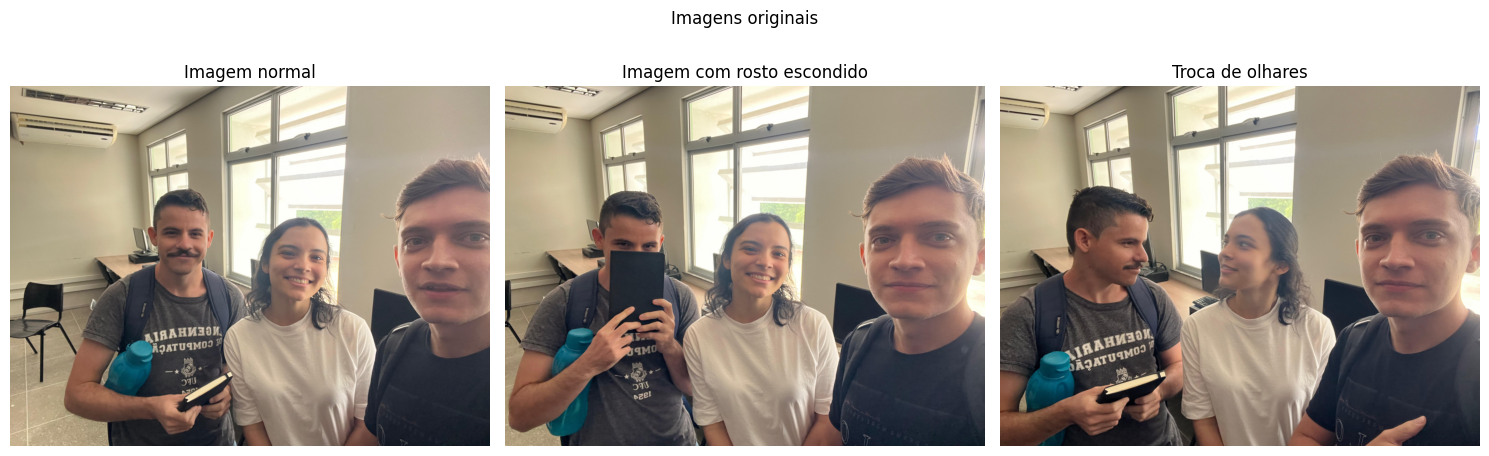

In [252]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

images = {
    "Imagem normal": r"jls.jpeg",
    "Imagem com rosto escondido": r"jls-rosto-escondido.jpeg",
    "Troca de olhares" : r"jlskkkkk.jpeg",
}

original_images = {}

for key, value in images.items():
    original_images[key] = cv2.imread(value)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (key, value) in enumerate(original_images.items()):
    axs[i].imshow(cv2.cvtColor(value, cv2.COLOR_BGR2RGB))
    axs[i].set_title(key)
    axs[i].axis("off")

plt.suptitle("Imagens originais")
plt.tight_layout()
plt.show()

## Detecção de faces com Haar Cascade

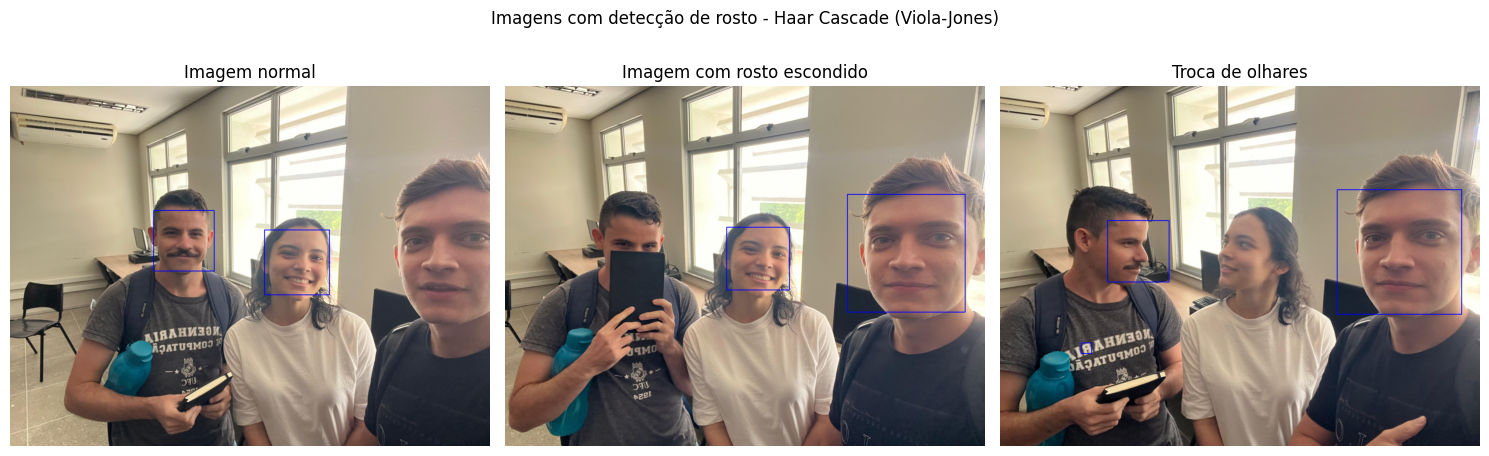

In [253]:
blue = (255, 0, 0)

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

detect_images = copy.deepcopy(original_images)
haar_faces = {}

for key, value in detect_images.items():
    gray = cv2.cvtColor(value, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    haar_faces[key] = faces
    for (x, y, w, h) in faces:
        detect_images[key] = cv2.rectangle(value, (x, y), (x + w, y + h), blue, 5)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (key, value) in enumerate(detect_images.items()):
    axs[i].imshow(cv2.cvtColor(value, cv2.COLOR_BGR2RGB), cmap="gray")
    axs[i].set_title(key)
    axs[i].axis("off")

plt.suptitle("Imagens com detecção de rosto - Haar Cascade (Viola-Jones)")
plt.tight_layout()

plt.show()

## Detecção de faces com o RetinaFace

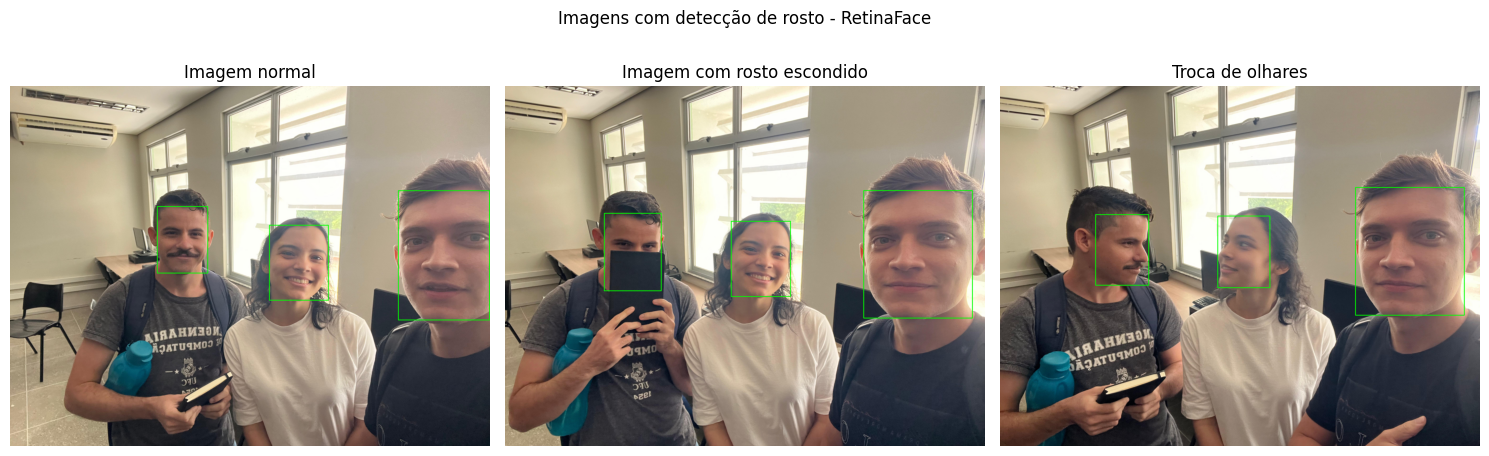

In [254]:
from retinaface import RetinaFace

green = (0, 255, 0)
retina_faces = {}

def detect_faces(image_path):
    resp = RetinaFace.detect_faces(image_path)
    img = cv2.imread(image_path)
    faces = []
    for face in resp:
        identity = resp[face]
        facial_area = identity['facial_area']
        faces.append(facial_area)
        cv2.rectangle(img, 
                      (facial_area[0], facial_area[1]), 
                      (facial_area[2], facial_area[3]), 
                      green, 5)
        
    
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), faces

retina_images = {}

for key, value in images.items():
    retina_images[key], retina_faces[key] = detect_faces(value)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (key, value) in enumerate(retina_images.items()):
    axs[i].imshow(value, cmap="gray")
    axs[i].set_title(key)
    axs[i].axis("off")

plt.suptitle("Imagens com detecção de rosto - RetinaFace")
plt.tight_layout()
plt.show()



image 1/1 /home/samuel/11º Semestre/Visão Comp/detect_faces/jls.jpeg: 480x640 3 FACEs, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/samuel/11º Semestre/Visão Comp/detect_faces/jls-rosto-escondido.jpeg: 480x640 2 FACEs, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/samuel/11º Semestre/Visão Comp/detect_faces/jlskkkkk.jpeg: 480x640 3 FACEs, 4.1ms
Speed: 2.1ms preprocess, 4.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


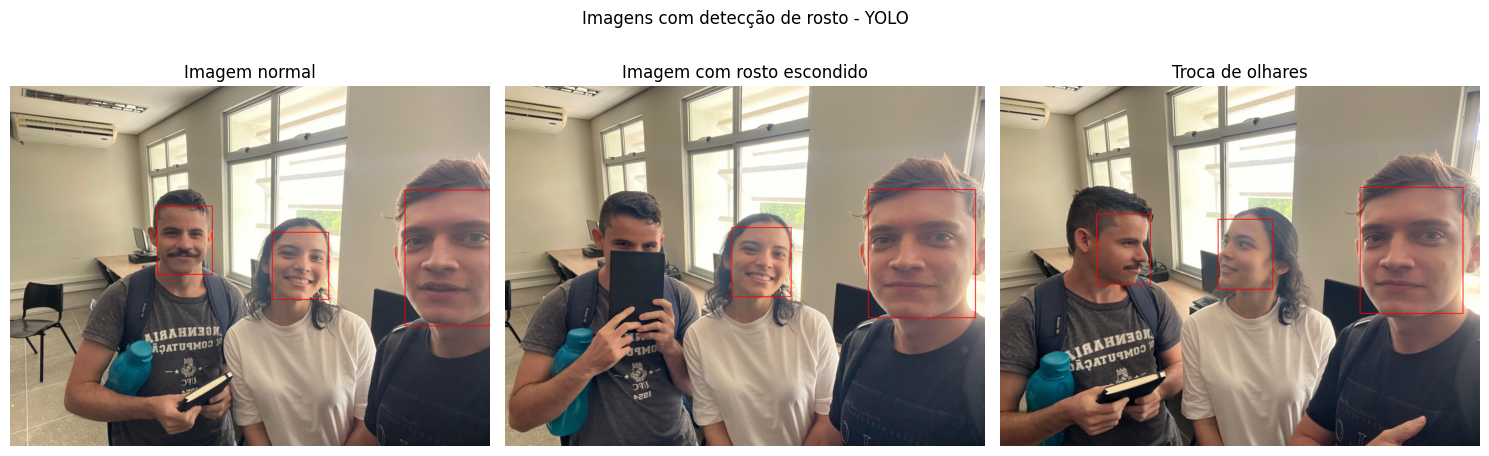

In [255]:
from ultralytics import YOLO

red = (0, 0, 255)

def yolo_detect_face(img_path):
    result = model(img_path)
    boxes = result[0].boxes
    img = cv2.imread(img_path)
    faces = []
    for box in boxes:
        x1 = int(box.xyxy.tolist()[0][0])
        y1 = int(box.xyxy.tolist()[0][1])
        x2 = int(box.xyxy.tolist()[0][2])
        y2 = int(box.xyxy.tolist()[0][3])
        faces.append((x1, y1, x2, y2))
        img = cv2.rectangle(img, (x1, y1), (x2, y2), red, 5)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), faces

model = YOLO("yolov8_best.pt")

yolo_images = {}
yolo_faces = {}

for key, value in images.items():
    yolo_images[key], yolo_faces[key] = yolo_detect_face(value)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (key, value) in enumerate(yolo_images.items()):
    axs[i].imshow(value, cmap="gray")
    axs[i].set_title(key)
    axs[i].axis("off")

plt.suptitle("Imagens com detecção de rosto - YOLO")
plt.tight_layout()
plt.show()
    

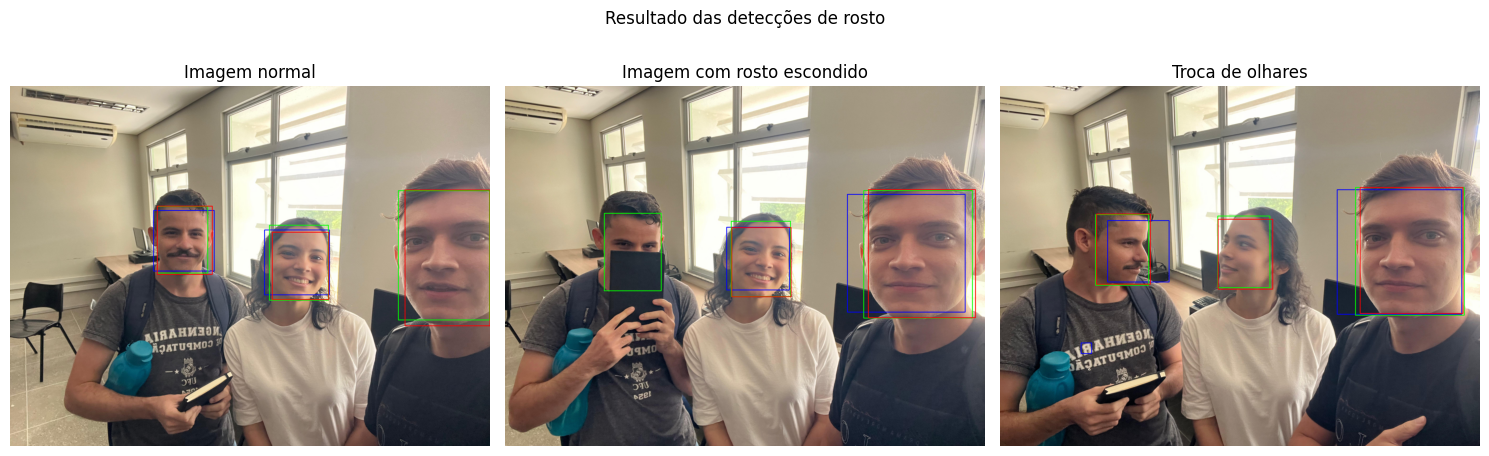

In [256]:
results = copy.deepcopy(original_images)

for i, (key, value) in enumerate(results.items()):
    for (x, y, w, h) in haar_faces[key]:
            results[key] = cv2.rectangle(value, (x, y), (x + w, y + h), blue, 5)

    for (x1, y1, x2, y2) in retina_faces[key]:
            results[key] = cv2.rectangle(value, (x1, y1), (x2, y2), green, 5)

    for (x1, y1, x2, y2) in yolo_faces[key]:
            results[key] = cv2.rectangle(value, (x1, y1), (x2, y2), red, 5)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (key, value) in enumerate(results.items()):
    axs[i].imshow(cv2.cvtColor(value, cv2.COLOR_BGR2RGB))
    axs[i].set_title(key)
    axs[i].axis("off")

plt.suptitle("Resultado das detecções de rosto")
plt.tight_layout()
plt.show()


## Cálculo do IOU

Referências: https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/


0: 480x640 3 FACEs, 4.5ms
Speed: 2.4ms preprocess, 4.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Imagem 1 - Haar: [[1206, 1045, 509, 509], [2138, 1209, 545, 545], [0, 0, 0, 0]]
Imagem 1 - Retina: [[1237, 1012, 1661, 1571], [2179, 1169, 2674, 1799], [3262, 879, 4028, 1965]]
Imagem 1 - YOLO: [[1237, 1009, 1699, 1582], [2203, 1228, 2677, 1793], [3318, 873, 4032, 2014]]
Imagem 1 - Haar x Retina: [0.770392749244713, 0.7958715865944116, 0.0]
Imagem 1 - Haar x YOLO: [0.8149945466845222, 0.7905640772988969, 0.0]
Imagem 1 - Retina x YOLO: [0.895538113048517, 0.848980214444155, 0.8808470917549767]
Valor médio de IoU: [0.8269751363259173, 0.8118052927791545, 0.29361569725165887]


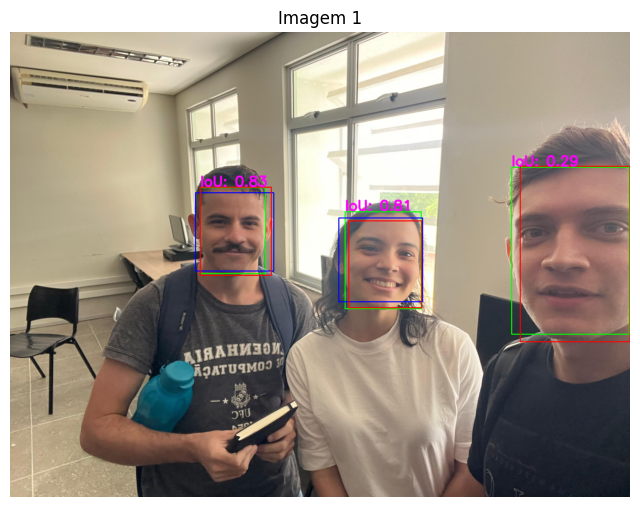

In [257]:
def get_iou(box_a, box_b, first_haar=True):
    if box_a == [0, 0, 0, 0] or box_b == [0, 0, 0, 0]:
        return 0.0
    # Converte as coordenadas do retângulo Haar
    if first_haar:
        # X, Y, X + W, Y + H
        box_a = [box_a[0], box_a[1], box_a[0] + box_a[2], box_a[1] + box_a[3]]
    
    # Determine as coordenadas (x, y) da interseção do retângulo
    xA = max(box_a[0], box_b[0])
    yA = max(box_a[1], box_b[1])
    xB = min(box_a[2], box_b[2])
    yB = min(box_a[3], box_b[3])
    
    # Calcula a área da interseção
    inter_area = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
    # Calcula a área de ambos os retângulos
    box_a_area = (box_a[2] - box_a[0] + 1) * (box_a[3] - box_a[1] + 1)
    box_b_area = (box_b[2] - box_b[0] + 1) * (box_b[3] - box_b[1] + 1)
    
    # Calcula a Intersection over Union (IoU)
    iou = inter_area / float(box_a_area + box_b_area - inter_area)
    
    # Retorna o valor da IoU
    return iou

rosa = (255, 0, 255)

# Imagem 1

img = r'jls.jpeg'

retina_face = RetinaFace.detect_faces(img)
img = cv2.imread(img)

haar = face_cascade.detectMultiScale(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 1.3, 5)
haar = haar.tolist()
haar.append([0,0,0,0]) # Adiciona um valor para a terceira face

area_face = []

for face in retina_face:
    identity = retina_face[face]
    facial_area = identity['facial_area']
    area_face.append(facial_area)

area_face = [area_face[0], area_face[2], area_face[1]] # Ordena as faces

yolo_result = model(img)
yolo_boxes = yolo_result[0].boxes

yolo_faces = []

for box in yolo_boxes:
    x1 = int(box.xyxy.tolist()[0][0])
    y1 = int(box.xyxy.tolist()[0][1])
    x2 = int(box.xyxy.tolist()[0][2])
    y2 = int(box.xyxy.tolist()[0][3])
    yolo_faces.append([x1, y1, x2, y2])

yolo_faces = [yolo_faces[1], yolo_faces[2], yolo_faces[0]] # Ordena as faces

print(f"Imagem 1 - Haar: {haar}")
print(f"Imagem 1 - Retina: {area_face}")
print(f"Imagem 1 - YOLO: {yolo_faces}")

iou_haar_retina, iou_haar_yolo, iou_retina_yolo, mean_iou = [], [], [], []

for i in range(len(haar)):
    cv2.rectangle(img, (area_face[i][0], area_face[i][1]), (area_face[i][2], area_face[i][3]), green, 5)
    cv2.rectangle(img, (haar[i][0], haar[i][1]), (haar[i][0] + haar[i][2], haar[i][1] + haar[i][3]), blue, 5)
    cv2.rectangle(img, (yolo_faces[i][0], yolo_faces[i][1]), (yolo_faces[i][2], yolo_faces[i][3]), red, 5)

    iou_haar_retina.append(get_iou(haar[i], area_face[i]))
    iou_haar_yolo.append(get_iou(haar[i], yolo_faces[i]))
    iou_retina_yolo.append(get_iou(area_face[i], yolo_faces[i], first_haar=False))

print(f"Imagem 1 - Haar x Retina: {iou_haar_retina}")
print(f"Imagem 1 - Haar x YOLO: {iou_haar_yolo}")
print(f"Imagem 1 - Retina x YOLO: {iou_retina_yolo}")

# Calcula a média dos valores de IoU de cada posição com a outra
# iou_haar_retina[0] + iou_haar_yolo[0] + iou_retina_yolo[0] / 3
mean_iou = []
for i in range(len(iou_haar_retina)):
    mean_iou.append((iou_haar_retina[i] + iou_haar_yolo[i] + iou_retina_yolo[i]) / 3)
    cv2.putText(img, f"IoU: {mean_iou[i]:.2f}", (area_face[i][0], area_face[i][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, rosa, 12)

print(f"Valor médio de IoU: {mean_iou}")

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Imagem 1")
plt.show()



0: 480x640 2 FACEs, 3.9ms
Speed: 2.4ms preprocess, 3.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Imagem 2 - Haar: [[1862, 1186, 527, 527], [2876, 910, 989, 989], [0, 0, 0, 0]]
Imagem 2 - Retina: [[1900, 1136, 2398, 1768], [3013, 878, 3926, 1949], [834, 1069, 1312, 1720]]
Imagem 2 - YOLO: [[1905, 1189, 2403, 1770], [3052, 870, 3952, 1946], [0, 0, 0, 0]]
Imagem 2 - Haar x Retina: [0.7701581574787679, 0.7570747993165017, 0.0]
Imagem 2 - Haar x YOLO: [0.8094202691232989, 0.7040433612291273, 0.0]
Imagem 2 - Retina x YOLO: [0.8960330242521852, 0.9217242636552655, 0.0]
Valor médio de IoU: [0.8252038169514173, 0.7942808080669649, 0.0]


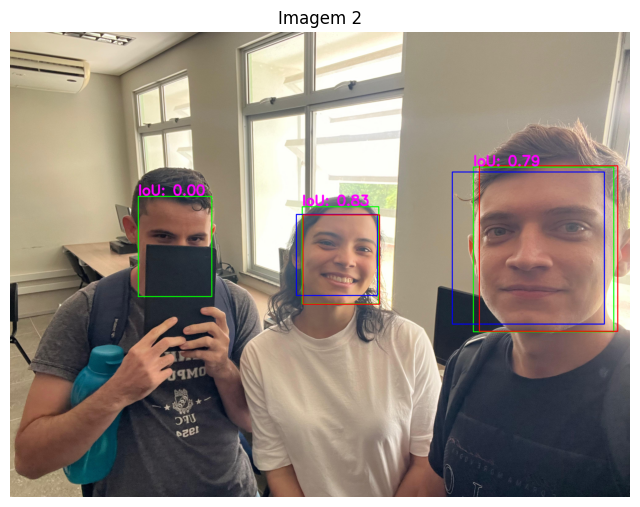

In [258]:
## Imagem 2

img2 = r'jls-rosto-escondido.jpeg'

retina_face = RetinaFace.detect_faces(img2)
img2 = cv2.imread(img2)

haar = face_cascade.detectMultiScale(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY), 1.3, 5)
haar = haar.tolist()
haar.append([0,0,0,0])

area_face = []

for face in retina_face:
    identity = retina_face[face]
    facial_area = identity['facial_area']
    area_face.append(facial_area)

yolo_result = model(img2)
yolo_boxes = yolo_result[0].boxes

yolo_faces = []

for box in yolo_boxes:
    x1 = int(box.xyxy.tolist()[0][0])
    y1 = int(box.xyxy.tolist()[0][1])
    x2 = int(box.xyxy.tolist()[0][2])
    y2 = int(box.xyxy.tolist()[0][3])
    yolo_faces.append([x1, y1, x2, y2])

yolo_faces = yolo_faces[::-1]
yolo_faces.append([0,0,0,0])

print(f"Imagem 2 - Haar: {haar}")
print(f"Imagem 2 - Retina: {area_face}")
print(f"Imagem 2 - YOLO: {yolo_faces}")

iou_haar_retina, iou_haar_yolo, iou_retina_yolo, mean_iou = [], [], [], []

for i in range(len(haar)):
    cv2.rectangle(img2, (area_face[i][0], area_face[i][1]), (area_face[i][2], area_face[i][3]), green, 5)
    cv2.rectangle(img2, (haar[i][0], haar[i][1]), (haar[i][0] + haar[i][2], haar[i][1] + haar[i][3]), blue, 5)
    cv2.rectangle(img2, (yolo_faces[i][0], yolo_faces[i][1]), (yolo_faces[i][2], yolo_faces[i][3]), red, 5)

    iou_haar_retina.append(get_iou(haar[i], area_face[i]))
    iou_haar_yolo.append(get_iou(haar[i], yolo_faces[i]))
    iou_retina_yolo.append(get_iou(area_face[i], yolo_faces[i], first_haar=False))

print(f"Imagem 2 - Haar x Retina: {iou_haar_retina}")
print(f"Imagem 2 - Haar x YOLO: {iou_haar_yolo}")
print(f"Imagem 2 - Retina x YOLO: {iou_retina_yolo}")

# Mean IoU
for i in range(len(iou_haar_retina)):
    mean_iou.append((iou_haar_retina[i] + iou_haar_yolo[i] + iou_retina_yolo[i]) / 3)
    cv2.putText(img2, f"IoU: {mean_iou[i]:.2f}", (area_face[i][0], area_face[i][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, rosa, 12)

print(f"Valor médio de IoU: {mean_iou}")

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Imagem 2")
plt.show()



0: 480x640 3 FACEs, 4.0ms
Speed: 2.3ms preprocess, 4.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Imagem 3 - Haar: [[904, 1130, 516, 516], [2832, 871, 1046, 1046], [0, 0, 0, 0]]
Imagem 3 - Retina: [[803, 1080, 1249, 1673], [2986, 852, 3900, 1925], [1829, 1092, 2267, 1694]]
Imagem 3 - YOLO: [[811, 1075, 1263, 1665], [3025, 852, 3889, 1910], [1832, 1119, 2291, 1706]]
Imagem 3 - Haar x Retina: [0.5054234654234654, 0.8173194935434128, 0.0]
Imagem 3 - Haar x YOLO: [0.5334602111828303, 0.7901188879122912, 0.0]
Imagem 3 - Retina x YOLO: [0.9321236145180751, 0.9321519064627408, 0.8840917971844076]
Valor médio de IoU: [0.6570024303747902, 0.846530095972815, 0.29469726572813587]


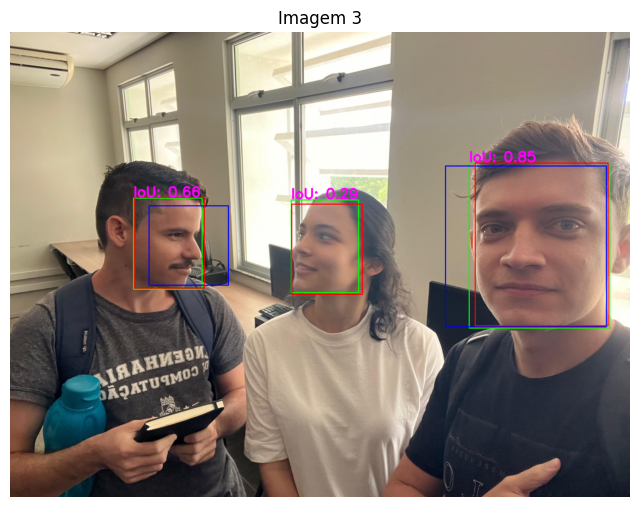

In [259]:
# Imagem 3
img3 = r'jlskkkkk.jpeg'

retina_face = RetinaFace.detect_faces(img3)
img3 = cv2.imread(img3)

haar = face_cascade.detectMultiScale(cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY), 1.3, 5)

haar = haar.tolist()
# Retirar o primeiro elemento da lista
haar.pop(0)
haar.append([0,0,0,0])

area_face = []

for face in retina_face:
    identity = retina_face[face]
    facial_area = identity['facial_area']
    area_face.append(facial_area)

area_face = [area_face[2], area_face[1], area_face[0]]

yolo_result = model(img3)
yolo_boxes = yolo_result[0].boxes

yolo_faces = []
for box in yolo_boxes:
    x1 = int(box.xyxy.tolist()[0][0])
    y1 = int(box.xyxy.tolist()[0][1])
    x2 = int(box.xyxy.tolist()[0][2])
    y2 = int(box.xyxy.tolist()[0][3])
    yolo_faces.append([x1, y1, x2, y2])

yolo_faces = [yolo_faces[2], yolo_faces[0], yolo_faces[1]]

print(f"Imagem 3 - Haar: {haar}")
print(f"Imagem 3 - Retina: {area_face}")
print(f"Imagem 3 - YOLO: {yolo_faces}")

iou_haar_retina, iou_haar_yolo, iou_retina_yolo = [], [], []

for i in range(len(haar)):
    cv2.rectangle(img3, (area_face[i][0], area_face[i][1]), (area_face[i][2], area_face[i][3]), green, 5)
    cv2.rectangle(img3, (haar[i][0], haar[i][1]), (haar[i][0] + haar[i][2], haar[i][1] + haar[i][3]), blue, 5)
    cv2.rectangle(img3, (yolo_faces[i][0], yolo_faces[i][1]), (yolo_faces[i][2], yolo_faces[i][3]), red, 5)

    iou_haar_retina.append(get_iou(haar[i], area_face[i]))
    iou_haar_yolo.append(get_iou(haar[i], yolo_faces[i]))
    iou_retina_yolo.append(get_iou(area_face[i], yolo_faces[i], first_haar=False))

print(f"Imagem 3 - Haar x Retina: {iou_haar_retina}")
print(f"Imagem 3 - Haar x YOLO: {iou_haar_yolo}")
print(f"Imagem 3 - Retina x YOLO: {iou_retina_yolo}")

# Mean IoU
mean_iou = []
for i in range(len(iou_haar_retina)):
    mean_iou.append((iou_haar_retina[i] + iou_haar_yolo[i] + iou_retina_yolo[i]) / 3)
    cv2.putText(img3, f"IoU: {mean_iou[i]:.2f}", (area_face[i][0], area_face[i][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 3, rosa, 12)

print(f"Valor médio de IoU: {mean_iou}")

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Imagem 3")
plt.show()


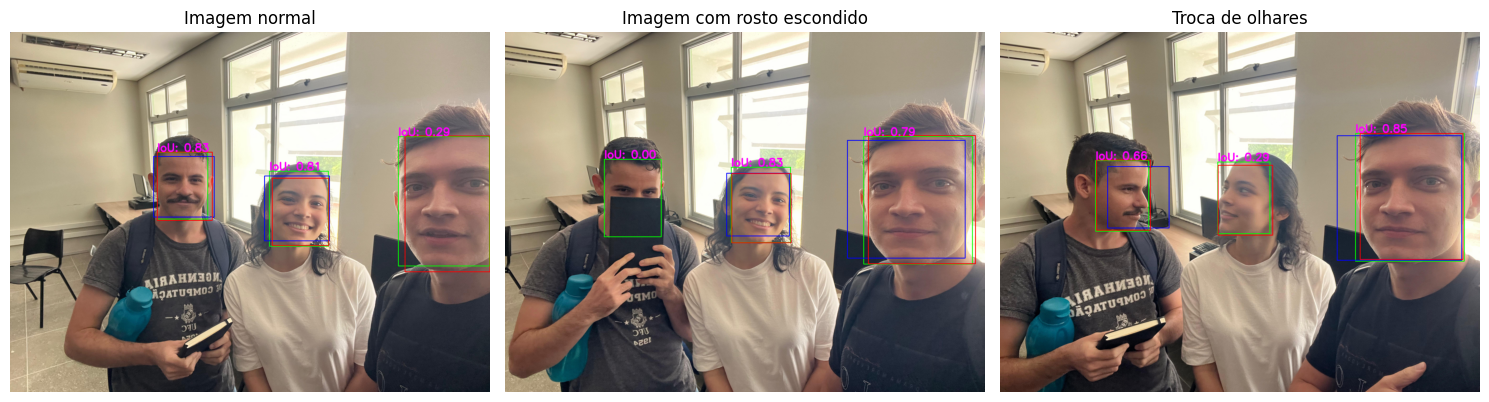

In [260]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
key = list(images.keys())
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].axis("off")
axs[0].set_title(key[0])

axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[1].axis("off")
axs[1].set_title(key[1])

axs[2].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
axs[2].axis("off")
axs[2].set_title(key[2])

plt.tight_layout()
plt.show()


## Extraindo rostos com RetinaFace

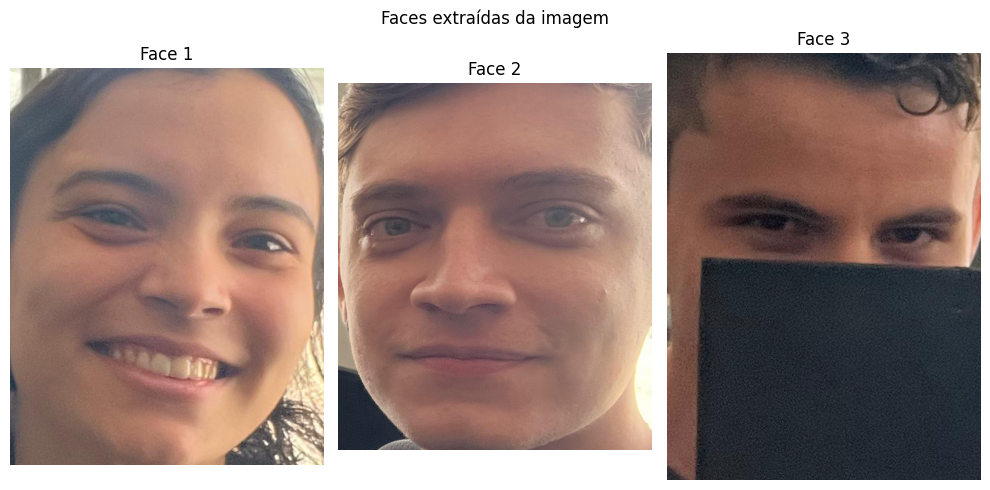

In [261]:
faces = RetinaFace.extract_faces("jls-rosto-escondido.jpeg", align=False)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
for i, face in enumerate(faces):
    axs[i].imshow(face)
    axs[i].axis("off")
    axs[i].set_title(f"Face {i + 1}")

plt.suptitle("Faces extraídas da imagem")
plt.tight_layout()
plt.show()